In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [3]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [4]:
data_dir = 'C:/Users/leonh/Desktop/Praktikum_AWI/Spitzbergen/data/alldata/'
df_all = pd.DataFrame()
# Erstellen Sie eine leere Liste, um DataFrames zu speichern
#years = []



#Schleife für die Monate
for year in range(1994,2022):
    dataframes = []
    for month in range(1, 13):
        file = f'NYA_cont_meteorology_{year}-{month:02d}.tab'
        filename = data_dir + file

        comment_lines = 0
        with open(filename, 'r') as file:
            for line in file:
                if line.startswith('*/'):
                    break
                comment_lines += 1
        # Erzeugen des Dateinamens
        

        # Lesen der CSV-Datei für den aktuellen Monat
        df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')
        
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
        # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.nanmean(df['T2 [°C] (average, Thermometer)'])
        df_all = pd.concat((df_all, df), ignore_index= True)
        # Fügen Sie den DataFrame zur Liste hinzu
        #dataframes.append(df)
    #years.append(dataframes.copy())







In [5]:
df_backup = df_all.copy()


In [6]:
#df_all = df_backup.copy()

In [8]:

df_all = df_all.drop(['Height [m]', 'T10 [°C] (average, Thermometer)', 'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)','DD2 [deg] (average, Anemometer)',
                     'SWD OG1 [W/m**2] (average, Pyranometer)', 'SWD RG8 [W/m**2] (average, Pyranometer)',
                     'UV rad [W/m**2] (average, Total Ultraviolet Ra...)', 'SSD [min]',
                    'T10 [°C]', 'DD10 [deg]', 'DD2 [deg]', 'FF2 [m/s]', 'SWD OG1 [W/m**2]', 'SWD RG8 [W/m**2]',
                    'UV rad [W/m**2]', 'Elevation [m a.s.l.]'], axis= 1)

print(df_all.columns)
len(df_all.columns)

Index(['Date/Time', 'SSD [min] (average)', 'T2 [°C] (average, Thermometer)',
       'FF2 [m/s] (average, Anemometer)',
       'RH [%] (average, redundant measuremen...)',
       'RH [%] (average, redundant measuremen...).1',
       'PoPoPoPo [hPa] (average, Barometer)', 'RH [%]', 'PoPoPoPo [hPa]',
       'RH [%] (at 2 m height, average, redun...)',
       'RH [%] (at 2 m height, average, redun...).1'],
      dtype='object')


11

In [10]:
print(df_all.columns)


Index(['Date/Time', 'SSD [min] (average)', 'T2 [°C] (average, Thermometer)',
       'FF2 [m/s] (average, Anemometer)',
       'RH [%] (average, redundant measuremen...)',
       'RH [%] (average, redundant measuremen...).1',
       'PoPoPoPo [hPa] (average, Barometer)', 'RH [%]', 'PoPoPoPo [hPa]',
       'RH [%] (at 2 m height, average, redun...)',
       'RH [%] (at 2 m height, average, redun...).1'],
      dtype='object')


In [12]:
# 
columns_to_average = [
    'PoPoPoPo [hPa]',
    'PoPoPoPo [hPa] (average, Barometer)'
]

# Calculate the row-wise mean for the selected columns
df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)

df_all = df_all.drop(columns_to_average, axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_392\1378378115.py:8: RuntimeWarning: Mean of empty slice
  df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)


In [15]:
columns_to_average = [
    'RH [%] (average, redundant measuremen...)',
    'RH [%] (average, redundant measuremen...).1',
    'RH [%]',
    'RH [%] (at 2 m height, average, redun...)',
    'RH [%] (at 2 m height, average, redun...).1']


# Calculate the row-wise mean for the selected columns
df_all['RH'] = np.nanmean(df_all[columns_to_average], axis=1)

df_all = df_all.drop(columns_to_average, axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_392\2142474936.py:10: RuntimeWarning: Mean of empty slice
  df_all['RH'] = np.nanmean(df_all[columns_to_average], axis=1)


In [16]:
df_all.columns

Index(['Date/Time', 'SSD [min] (average)', 'T2 [°C] (average, Thermometer)',
       'FF2 [m/s] (average, Anemometer)', 'PoPoPoPo', 'RH'],
      dtype='object')

In [ ]:
# # df_all.columns
# # df_all['T2'] = np.nanmean(df_all.loc[['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)']], axis = 1)


# # Specify the list of column names to average
# columns_to_average = [
#     'T2 [°C] (average, Thermometer)',
#     'T2 [°C]',
#     'T2 [°C] (1-min average, Thermometer, T...)',
#     'T2 [°C] (1-min average; Sensor changed...)'
# ]

# # Calculate the row-wise mean for the selected columns
# df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


# df_all = df_all.drop(['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C]','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_10796\3424619239.py:14: RuntimeWarning: Mean of empty slice
  df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


In [17]:
df_all.rename(columns = {'T2 [°C] (average, Thermometer)':'T2'}, inplace = True)

In [18]:
df_all.columns

Index(['Date/Time', 'SSD [min] (average)', 'T2',
       'FF2 [m/s] (average, Anemometer)', 'PoPoPoPo', 'RH'],
      dtype='object')

In [ ]:
df_month = pd.DataFrame(columns=[df_all.columns])

for year in range(1983,2022):
    for month in range(1, 13):
        start_date = pd.to_datetime(f'{year}-{month:02d}')
        if month < 12:
            end_date = pd.to_datetime(f'{year}-{month+1:02d}')
        else:
            end_date = pd.to_datetime(f'{year+1}-01')
        df_temp = np.nanmean(df_all.loc[df_all['Date/Time'] == slice(start_date, end_date), :], axis =1)

In [19]:
import datetime 

# Create an empty DataFrame for monthly aggregation
df_month = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])
df_dates = pd.DataFrame(columns=['Date'])

for year in range(1994, 2022):
    for month in range(1, 13):
        start_date = pd.to_datetime(f'{year}-{month:02d}')
        if month < 12:
            end_date = pd.to_datetime(f'{year}-{month+1:02d}')
        else:
            end_date = pd.to_datetime(f'{year+1}-01')
        
        # Filter the data for the current month
        filtered_data = df_all[(df_all['Date/Time'] >= start_date) & (df_all['Date/Time'] < end_date)]
        
        day_min_month = []
        day_max_month = []

        for i in range (1, 29):
            filtered_data_day = filtered_data[(filtered_data['Date/Time'] >=  start_date+ datetime.timedelta(days=i-1)) & (filtered_data['Date/Time'] < start_date+ datetime.timedelta(days=i))]
            day_min = np.min(filtered_data['T2'])
            day_max = np.max(filtered_data['T2'])
            day_min_month.append(day_min)
            day_max_month.append(day_max)


        day_max_mean = np.nanmean(day_max_month)
        day_min_mean = np.nanmean(day_min_month)
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2'])
        temp_RH = np.nanmean(filtered_data['RH'])
        temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean], 'RH':[temp_RH], 'Pres': [temp_Pres]})
        df_month = pd.concat([df_month, temp_df], ignore_index= True)
        

C:\Users\leonh\AppData\Local\Temp\ipykernel_392\2541284414.py:35: RuntimeWarning: Mean of empty slice
  temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])


In [20]:
#df_month['Date'] = df_dates['Date']
df_month['DTR'] = np.subtract(df_month['T2Max'], df_month['T2Min'])
#df_month

In [39]:
df_years = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'DTR', 'RH', 'Pres'])


for year in range(1994, 2022):
        start_date = pd.to_datetime(f'{year}-01')
        end_date = pd.to_datetime(f'{year+1}-01')

        # Filter the data for the current month
        filtered_data = df_month[(df_month['Date'] >= start_date) & (df_month['Date'] < end_date)]




        day_max_mean = np.nanmean(filtered_data['T2Max'])
        day_min_mean = np.nanmean(filtered_data['T2Min'])
        temp_DTR = np.nanmean(filtered_data['DTR'])
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2Avg'])
        temp_RH = np.nanmean(filtered_data['RH'])
        temp_Pres = np.nanmean(filtered_data['Pres'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean],'DTR': [temp_DTR], 'RH':[temp_RH], 'Pres': [temp_Pres]})
        df_years = pd.concat([df_years, temp_df], ignore_index= True)
        

In [40]:
#df_month.to_csv('Dataframe_Month_Averages.csv')
df_years

,Date,T2Avg,T2Min,T2Max,DTR,RH,Pres
0,1994-01-01,-5.807998,-17.516667,3.716667,21.233333,73.898773,1004.442395
1,1995-01-01,-5.963119,-16.816667,4.541667,21.358333,74.058144,1007.304636
2,1996-01-01,-4.869745,-16.241667,5.000000,21.241667,74.879831,1009.130820
3,1997-01-01,-5.761029,-17.425000,5.533333,22.958333,69.011115,1007.766470
4,1998-01-01,-5.803515,-17.033333,4.533333,21.566667,74.032590,1012.227571
5,1999-01-01,-3.982346,-15.691667,6.500000,22.191667,75.628175,1007.118473
6,2000-01-01,-4.214082,-14.875000,5.175000,20.050000,75.094794,1006.847738
7,2001-01-01,-4.733914,-16.025000,5.916667,21.941667,74.019918,1009.086104
8,2002-01-01,-4.318761,-15.708333,5.408333,21.116667,75.212718,1009.845904
9,2003-01-01,-5.863690,-17.475000,5.275000,22.750000,75.573182,1008.296896


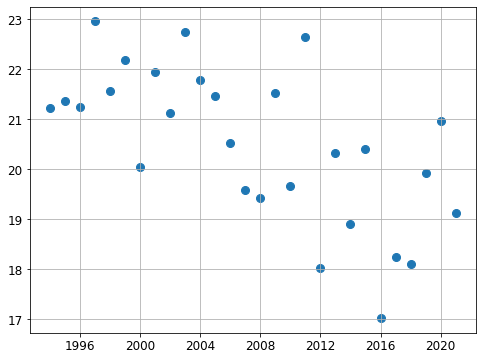

In [42]:
plt.scatter(df_years['Date'], df_years['DTR'])

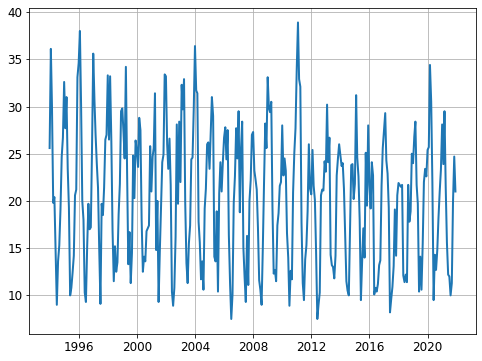

In [22]:
plt.plot(df_month['Date'], df_month['DTR'])

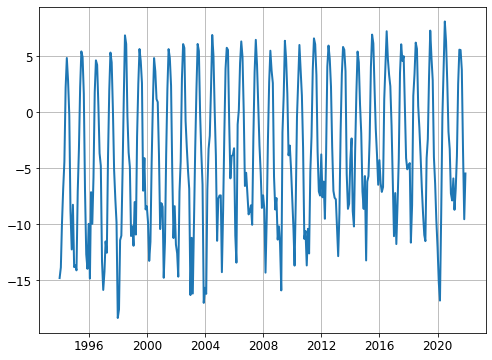

In [23]:
plt.plot(df_month['Date'], df_month['T2Avg'])

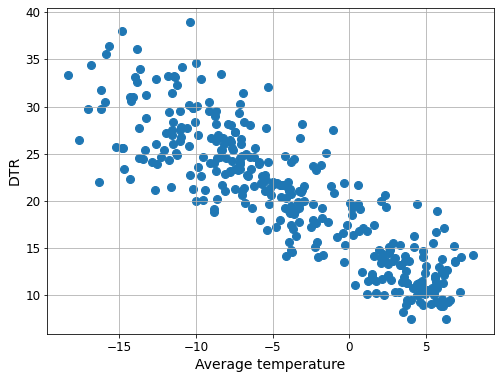

In [24]:
plt.scatter(df_month['T2Avg'], df_month['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')


plt.show()



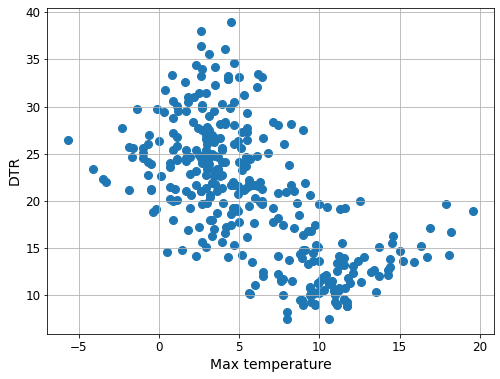

In [25]:
plt.scatter(df_month['T2Max'], df_month['DTR'])

plt.xlabel('Max temperature')
plt.ylabel('DTR')


plt.show()

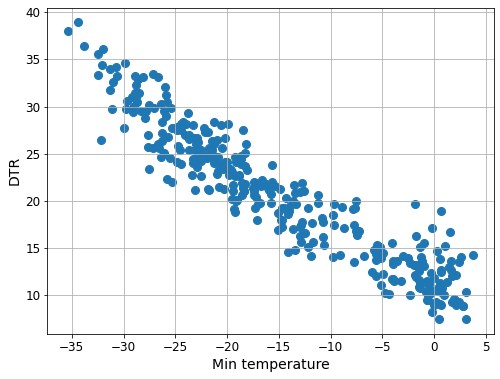

In [27]:
plt.scatter(df_month['T2Min'], df_month['DTR'])

plt.xlabel('Min temperature')
plt.ylabel('DTR')


plt.show()

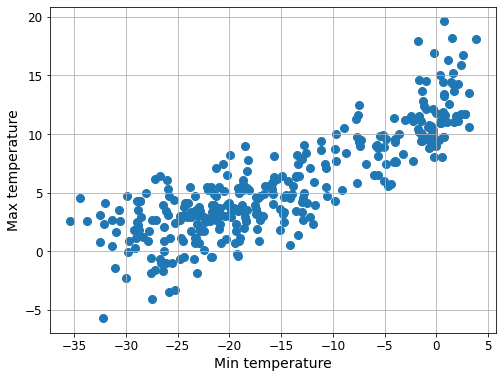

In [28]:
plt.scatter(df_month['T2Min'], df_month['T2Max'])

plt.xlabel('Min temperature')
plt.ylabel('Max temperature')


plt.show()

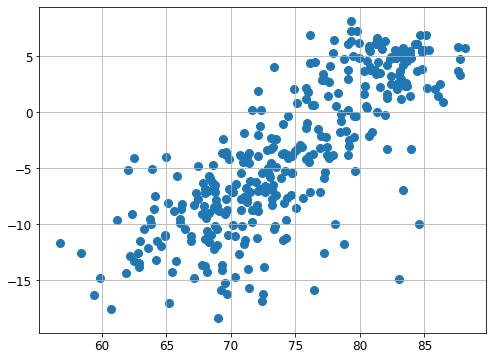

In [29]:
plt.scatter(df_month['RH'], df_month['T2Avg'])

